In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
subject1 = scipy.io.loadmat('processed_EMG_data_subject1.mat')
subject2 = scipy.io.loadmat('processed_EMG_data_subject2.mat')

In [3]:
type(subject1)
print(subject1.keys())

subject1['fs']
fs=512

dict_keys(['__header__', '__version__', '__globals__', 'fs', 'labels', 'task_data_matrix', 'task_labels'])


In [4]:
subject1['labels'].flatten()
labels=['ExtProx','ExtDist', 'FlxProx','FlxDist']
labels

['ExtProx', 'ExtDist', 'FlxProx', 'FlxDist']

In [5]:
subj1_task_data_matrix=subject1['task_data_matrix'].flatten() #180 개 , 각 trial 마다, (4*datapoint개 2.5초 task)

subj2_task_data_matrix=subject2['task_data_matrix'].flatten() #180 개 , 각 trial 마다, (4*datapoint개 2.5초 task)

In [6]:
subj1_task_labels=subject1['task_labels'].flatten() #180개

subj2_task_labels=subject2['task_labels'].flatten() #180개

In [7]:
subj1_task_data_matrix[0].shape

(4, 1287)

In [13]:
def calc_mav(x):
    '''특정 data x (window)를 주면 그 datapoint를 받아서, mav를 계산해서 반환..'''
    x=np.array(x)
    mav=np.sum(np.abs(x))/len(x)
    return mav
    
def calc_zcr(x):
    '''특정 data x 를 주면 그 datapoint를 받아서, zcr를 계산해서 반환..'''
    x=np.array(x)
    zcr=np.sum(np.abs(np.diff(np.sign(x))))/(2*len(x))
    return zcr


In [234]:
wsize_milisec=200

wsize = math.floor((wsize_milisec / 1000) * fs)  # 200ms window --> 각 12개, 100ms이면 각 25 개
feature_matrix = []

for trial in range(180):
    feature_data = []  # Stores 4 * feature per window
    for signal in subj1_task_data_matrix[trial]:  # Iterate over each sensor's signal
        window_count = len(signal) // wsize  # Total windows
        data = []

        for idx in range(window_count):
            if idx == (window_count - 1):
                value = calc_mav(signal[idx * wsize:])  # Last window may be smaller
            else:
                value = calc_mav(signal[idx * wsize:(idx + 1) * wsize])

            data.append(float(value))  # Convert NumPy float64 to Python float
        feature_data.append(data)
    
    feature_matrix.append(feature_data)
    
mav_feature_matrix=feature_matrix

In [22]:
wsize = math.floor((wsize_milisec / 1000) * fs)  # 200ms window --> 각 12개, 100ms이면 각 25 개
feature_matrix = []

for trial in range(180):
    feature_data = []  # Stores 4 * feature per window
    for signal in subj1_task_data_matrix[trial]:  # Iterate over each sensor's signal
        window_count = len(signal) // wsize  # Total windows
        data = []

        for idx in range(window_count):
            if idx == (window_count - 1):
                value = calc_zcr(signal[idx * wsize:])  # Last window may be smaller
            else:
                value = calc_zcr(signal[idx * wsize:(idx + 1) * wsize])

            data.append(float(value))  # Convert NumPy float64 to Python float
        feature_data.append(data)
    
    feature_matrix.append(feature_data)

zcr_feature_matrix=feature_matrix

Text(0.5, 1.0, 'ZCR feature : 0.2 sec window')

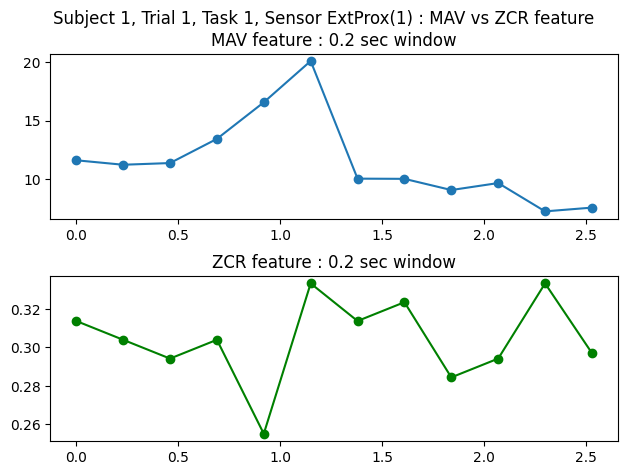

In [23]:
#feature Matrix _ 180개 feature data 가 있는 행렬
#feature data : 각각 (4*12) 형태의 MAV feature가 존재..
first_mav=mav_feature_matrix[0][0]
first_zcr=zcr_feature_matrix[0][0]

size=len(subj1_task_data_matrix[trial][0])

time=np.linspace(0,size/512,size)

#실제 Motor Task그림
# plt.plot(time,subj1_task_data_matrix[trial][0])

#feature 그림

fig, axs = plt.subplots(2,1)
fig.suptitle("Subject 1, Trial 1, Task 1, Sensor ExtProx(1) : MAV vs ZCR feature")
fig.tight_layout(h_pad=2)

axs[0].plot(np.linspace(0,size/512,len(first_mav)),first_mav)
axs[0].scatter(np.linspace(0,size/512,len(first_mav)),first_mav)
axs[0].set_title(f'MAV feature : {wsize_milisec/1000} sec window')

axs[1].plot(np.linspace(0,size/512,len(first_mav)),np.array(first_zcr),color='green')
axs[1].scatter(np.linspace(0,size/512,len(first_mav)),np.array(first_zcr),color='green')
axs[1].set_title(f'ZCR feature : {wsize_milisec/1000} sec window')




In [24]:
subj1_task_data_matrix[trial][0].shape

(1294,)

In [235]:
mav_feature_matrix=np.array(mav_feature_matrix)
zcr_feature_matrix=np.array(zcr_feature_matrix)
# var_feature_matrix=np.array(var_feature_matrix)


# np.save('mav_feature_subj1',mav_feature_matrix)
# np.save('zcr_feature_subj1',zcr_feature_matrix)

# np.save('mav_feature_subj2',mav_feature_matrix)
# np.save('zcr_feature_subj2',zcr_feature_matrix)

# np.save('var_feature_subj1',var_feature_matrix)
# np.save('var_feature_subj2',var_feature_matrix)

In [26]:
print(mav_feature_matrix.shape,zcr_feature_matrix.shape) 
print(subj1_task_labels,subj2_task_labels)

(180, 4, 12) (180, 4, 12)
[2 1 1 3 1 2 1 1 1 3 3 1 2 2 3 2 3 3 2 1 3 3 1 2 3 2 2 1 2 3 3 3 2 3 3 2 3
 1 2 3 2 1 1 3 1 2 2 1 1 1 2 3 1 3 2 2 1 2 3 1 3 1 3 2 1 2 1 2 1 3 3 2 3 3
 3 1 2 1 1 1 2 2 2 3 1 2 1 2 3 3 2 3 3 2 1 1 1 2 2 1 2 3 3 2 1 3 3 2 1 2 1
 1 2 3 3 2 3 1 1 3 3 1 3 1 2 3 1 3 2 2 2 1 2 3 3 1 1 2 1 3 2 1 2 1 2 1 3 2
 3 3 2 1 3 1 2 3 3 3 2 3 1 1 1 2 3 3 2 1 2 1 2 3 1 1 2 3 2 1 3 2] [1 2 2 2 2 2 3 1 1 2 3 1 1 2 3 2 1 1 3 2 1 3 2 3 3 3 1 1 3 3 1 1 2 1 2 2 2
 2 2 3 3 1 3 3 2 3 3 1 3 2 1 1 1 3 2 1 3 2 3 1 1 2 1 1 3 3 1 2 3 1 2 3 2 1
 2 1 1 2 2 3 1 3 2 3 3 1 3 3 2 2 3 2 1 1 2 2 3 3 3 1 1 2 2 1 2 1 2 2 1 2 3
 1 3 3 1 3 3 2 1 3 3 1 2 1 3 3 2 2 2 2 1 1 1 3 2 1 2 1 3 3 2 3 2 3 3 1 2 1
 1 3 3 3 2 2 1 1 1 1 2 3 1 3 3 2 3 1 1 3 3 2 2 2 1 3 2 1 2 1 2 3]


In [236]:

from sklearn.preprocessing import StandardScaler

# Convert to NumPy arrays (Shape: (180, 4, 12))
mav_feature_matrix = np.array(mav_feature_matrix)  
zcr_feature_matrix = np.array(zcr_feature_matrix)  

# Subject 1 labels (Shape: (180,))
labels_subj1 = np.array(subj1_task_labels)  

# Flatten the feature matrices for plotting (Shape: (180*12, 4))
mav_subj1 = mav_feature_matrix.reshape(-1, 4)  # (180*12, 4) -> Each column = one sensor
zcr_subj1 = zcr_feature_matrix.reshape(-1, 4)  

# Expand labels to match windowed data (Each trial has 12 windows, so repeat labels)
labels_expanded = np.repeat(labels_subj1, 12)  # Shape: (180*12,)

# # Optional: Normalize features
# normalize = True
# if normalize:
#     scaler = StandardScaler()
#     mav_subj1 = scaler.fit_transform(mav_subj1)
#     zcr_subj1 = scaler.fit_transform(zcr_subj1)

# Define class colors
colors = {1: 'red', 2: 'green', 3: 'blue'}
class_labels = ["Pinch", "Point", "Grasp"]

# Create 4 subplots for each sensor
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("2D Feature Space: MAV vs. ZCR (Subject 1)")

# Loop through 4 EMG sensors
for i, ax in enumerate(axes.flatten()):
    for trial in range(mav_subj1.shape[0]):  # Iterate over all windowed data points
        ax.scatter(mav_subj1[trial, i], zcr_subj1[trial, i], 
                   color=colors[labels_expanded[trial]], alpha=0.5, s=20)

    ax.set_xlabel("MAV (Mean Absolute Value)")
    ax.set_ylabel("ZCR (Zero Crossing Rate)")
    ax.set_title(f"Sensor: {labels[i]}")  # Assuming `labels` contains sensor names
    ax.grid(True)

# Add a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[c], markersize=10) 
           for c in colors]
fig.legend(handles, class_labels, loc="upper right", title="Class Labels")

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000002B555D12A60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002B5582809D0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



## Get grand average

In [106]:
#subject 1 - we will only do Proximal flex muscle - 3번째..(index= 2)


S1_abs_task_data=np.array([abs(data[2,:1283]) for data in subj1_task_data_matrix]) #180*4*Datapoint 형태 --> pick only flex proximal!
S2_abs_task_data=np.array([abs(data[2,:1283]) for data in subj2_task_data_matrix])
#absolute!

#여기서 minumum 기준으로 자르기.. S1/S2=1283 이 최소 길이...



In [107]:
subj1_task_labels
subj2_task_labels

array([1, 2, 2, 2, 2, 2, 3, 1, 1, 2, 3, 1, 1, 2, 3, 2, 1, 1, 3, 2, 1, 3,
       2, 3, 3, 3, 1, 1, 3, 3, 1, 1, 2, 1, 2, 2, 2, 2, 2, 3, 3, 1, 3, 3,
       2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 2, 1, 3, 2, 3, 1, 1, 2, 1, 1, 3, 3,
       1, 2, 3, 1, 2, 3, 2, 1, 2, 1, 1, 2, 2, 3, 1, 3, 2, 3, 3, 1, 3, 3,
       2, 2, 3, 2, 1, 1, 2, 2, 3, 3, 3, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       3, 1, 3, 3, 1, 3, 3, 2, 1, 3, 3, 1, 2, 1, 3, 3, 2, 2, 2, 2, 1, 1,
       1, 3, 2, 1, 2, 1, 3, 3, 2, 3, 2, 3, 3, 1, 2, 1, 1, 3, 3, 3, 2, 2,
       1, 1, 1, 1, 2, 3, 1, 3, 3, 2, 3, 1, 1, 3, 3, 2, 2, 2, 1, 3, 2, 1,
       2, 1, 2, 3], dtype=uint8)

In [187]:
#subject 1 - we will only do Proximal flex muscle - 3번째..(index= 2)

S1_class1_idx=np.where(subj1_task_labels==1)
S1_class2_idx=np.where(subj1_task_labels==2)
S1_class3_idx=np.where(subj1_task_labels==3)
S1_class1_task_data=S1_abs_task_data[S1_class1_idx]
S1_class2_task_data=S1_abs_task_data[S1_class2_idx]
S1_class3_task_data=S1_abs_task_data[S1_class3_idx]
#subject 2
S2_class1_idx=np.where(subj2_task_labels==1)
S2_class2_idx=np.where(subj2_task_labels==2)
S2_class3_idx=np.where(subj2_task_labels==3)

S2_class1_task_data=S2_abs_task_data[S2_class1_idx]
S2_class2_task_data=S2_abs_task_data[S2_class2_idx]
S2_class3_task_data=S2_abs_task_data[S2_class3_idx]




In [188]:
print(S1_class1_task_data.shape,S1_class2_task_data.shape,S1_class3_task_data.shape)
print(S2_class1_task_data.shape,S2_class2_task_data.shape,S2_class3_task_data.shape)
#각 class당 60 번의 trial 을 하였음 !

(60, 1283) (60, 1283) (60, 1283)
(60, 1283) (60, 1283) (60, 1283)


In [189]:
from scipy.signal import butter, lfilter

#SUbject 1 filtered
# Butterworth low-pass filter function
def butter_lowpass_filter(data, cutoff, fs, order=4):
    # Nyquist frequency is half of the sampling rate
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    # Get the filter coefficients (b, a)
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    # Apply the filter to the data
    filtered_data = lfilter(b, a, data)
    return filtered_data

# Parameters
fs = 512  # Sampling frequency
cutoff = 5  # Cutoff frequency in Hz

# Assuming the data for each class is stored in S1_class1_task_data, S1_class2_task_data, S1_class3_task_data
S1_class1_filtered = np.zeros_like(S1_class1_task_data)  # Shape (60, 1283)
S1_class2_filtered = np.zeros_like(S1_class2_task_data)  # Shape (60, 1283)
S1_class3_filtered = np.zeros_like(S1_class3_task_data)  # Shape (60, 1283)

# Apply the filter for each trial in each class
for i in range(S1_class1_task_data.shape[0]):  # Iterate over trials (60 trials)
    S1_class1_filtered[i] = butter_lowpass_filter(S1_class1_task_data[i], cutoff, fs)
    S1_class2_filtered[i] = butter_lowpass_filter(S1_class2_task_data[i], cutoff, fs)
    S1_class3_filtered[i] = butter_lowpass_filter(S1_class3_task_data[i], cutoff, fs)
#=========================
#subject 2 filtered
# Butterworth low-pass filter function

# Parameters
fs = 512  # Sampling frequency
cutoff =5  # Cutoff frequency in Hz

# Assuming the data for each class is stored in S1_class1_task_data, S1_class2_task_data, S1_class3_task_data
S2_class1_filtered = np.zeros_like(S2_class1_task_data)  # Shape (60, 1283)
S2_class2_filtered = np.zeros_like(S2_class2_task_data)  # Shape (60, 1283)
S2_class3_filtered = np.zeros_like(S2_class3_task_data)  # Shape (60, 1283)

# Apply the filter for each trial in each class
for i in range(S1_class1_task_data.shape[0]):  # Iterate over trials (60 trials)
    S2_class1_filtered[i] = butter_lowpass_filter(S2_class1_task_data[i], cutoff, fs)
    S2_class2_filtered[i] = butter_lowpass_filter(S2_class2_task_data[i], cutoff, fs)
    S2_class3_filtered[i] = butter_lowpass_filter(S2_class3_task_data[i], cutoff, fs)

In [190]:
S1_class1_filtered.shape
S1_class1_task_data[0].shape
np.mean(S1_class1_filtered,axis=0)

array([6.81327232e-06, 6.13240744e-05, 2.76749982e-04, ...,
       1.13824323e+01, 1.13711294e+01, 1.13589171e+01])

In [191]:
np.mean(np.array([[-1,2],[3,-1]]),axis=0)

array([1. , 0.5])

Text(0.5, 1.0, 'Class 3 MAV (Grasp)')

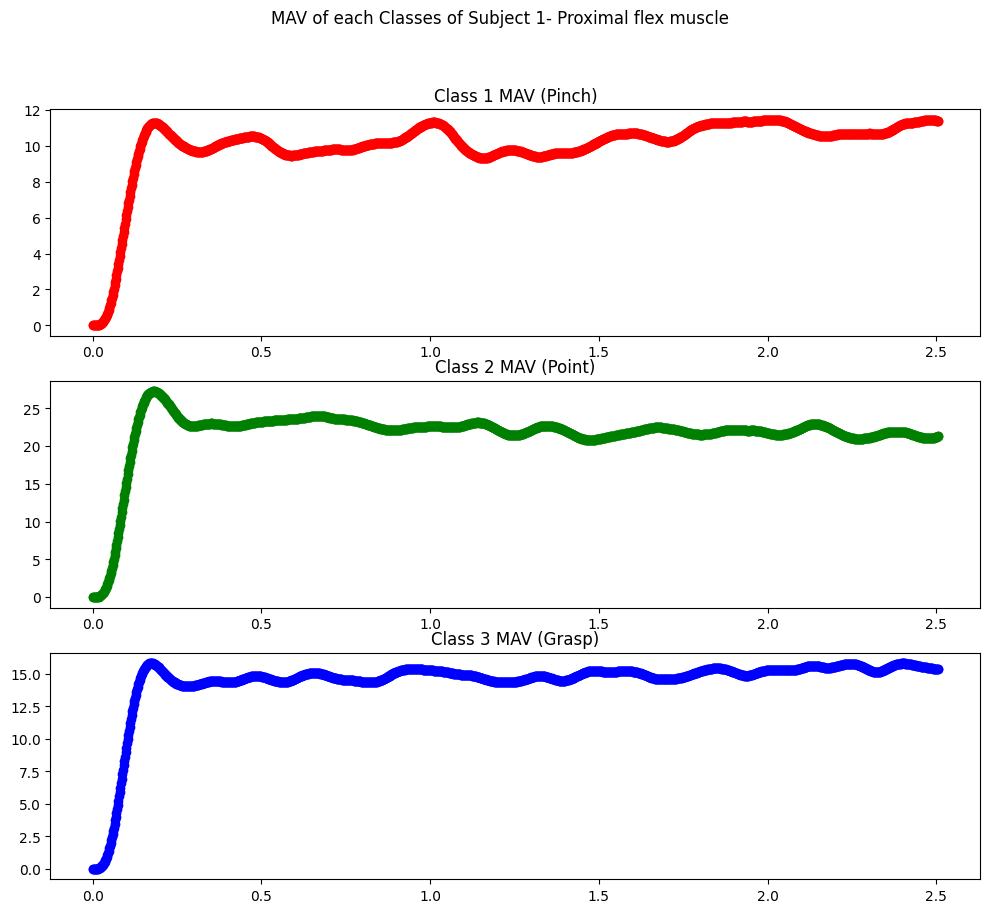

In [197]:
#class 1 MAV
import random
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
fig.suptitle("MAV of each Classes of Subject 1- Proximal flex muscle")
time_vector=np.linspace(0,1283/512,1283)

axes[0].scatter(time_vector,np.mean(S1_class1_filtered,axis=0),color='r')
axes[0].set_title("Class 1 MAV (Pinch)")
axes[1].scatter(time_vector,np.mean(S1_class2_filtered,axis=0),color='g')
axes[1].set_title("Class 2 MAV (Point)")
axes[2].scatter(time_vector,np.mean(S1_class3_filtered,axis=0),color='b')
axes[2].set_title("Class 3 MAV (Grasp)")


# Sample 5 random trials from each class without replacement and calculate MAV
# axes[0].plot(time_vector, np.mean(S1_class1_filtered[np.random.choice(S1_class1_filtered.shape[0], 5, replace=False)], axis=0))
# axes[1].plot(time_vector, np.mean(S1_class2_filtered[np.random.choice(S1_class2_filtered.shape[0], 5, replace=False)], axis=0))
# axes[2].plot(time_vector, np.mean(S1_class3_filtered[np.random.choice(S1_class3_filtered.shape[0], 5, replace=False)], axis=0))

Text(0.5, 1.0, 'Class 3 MAV (Grasp)')

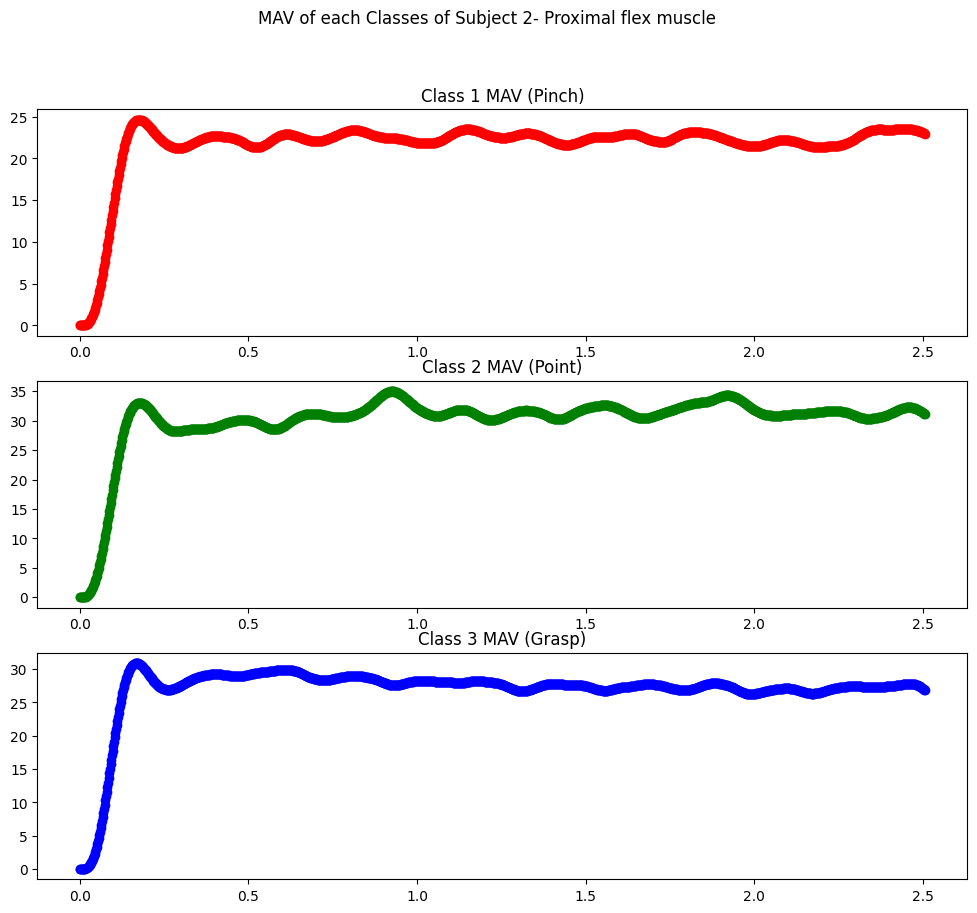

In [202]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
fig.suptitle("MAV of each Classes of Subject 2- Proximal flex muscle")
time_vector=np.linspace(0,1283/512,1283)

axes[0].scatter(time_vector,np.mean(S2_class1_filtered,axis=0),color='r')
axes[0].set_title("Class 1 MAV (Pinch)")
axes[1].scatter(time_vector,np.mean(S2_class2_filtered,axis=0),color='g')
axes[1].set_title("Class 2 MAV (Point)")
axes[2].scatter(time_vector,np.mean(S2_class3_filtered,axis=0),color='b')
axes[2].set_title("Class 3 MAV (Grasp)")

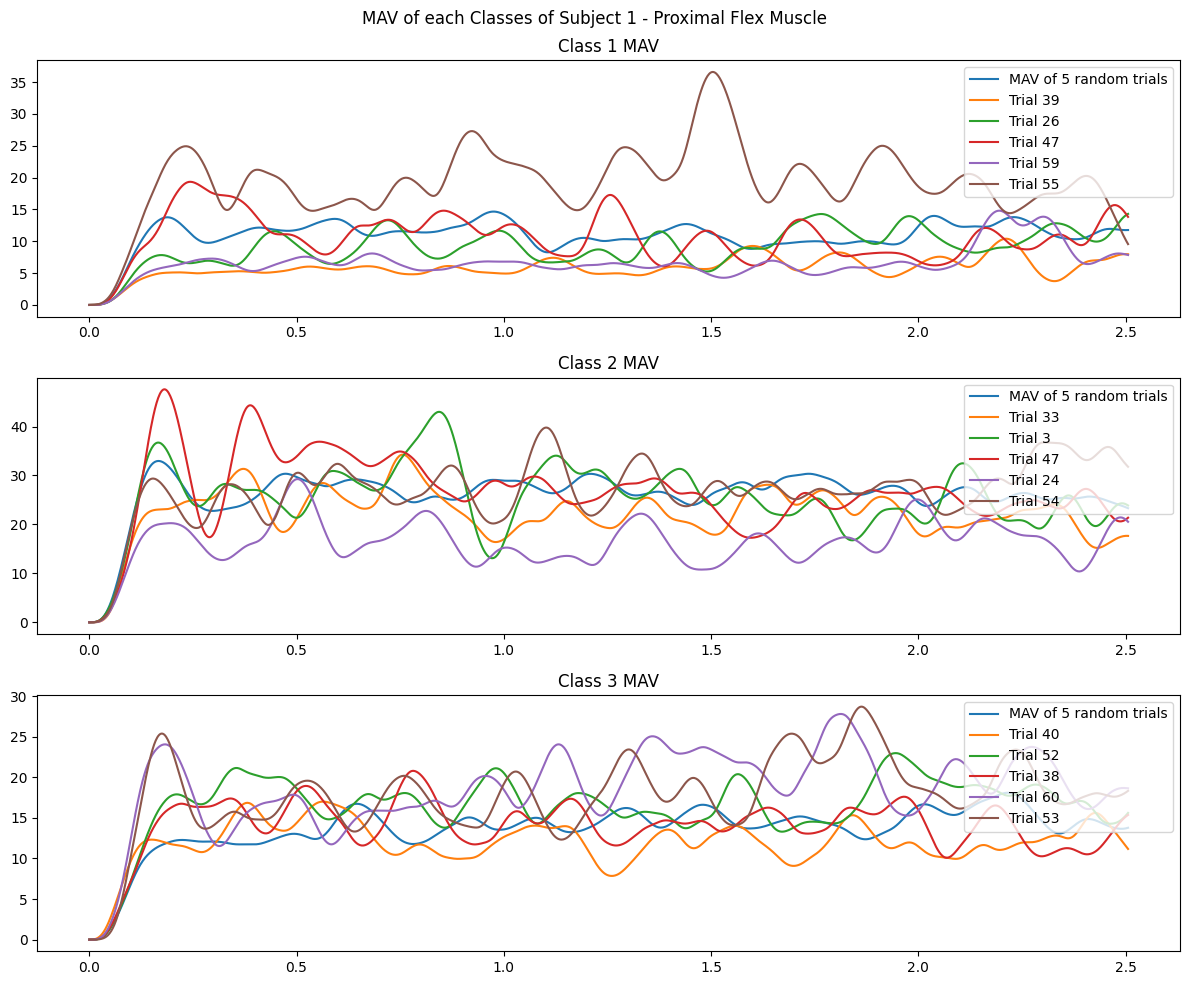

In [201]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Time vector for plotting
time_vector = np.linspace(0, 1283 / 512, 1283)

# Create the plot
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
fig.suptitle("MAV of each Classes of Subject 1 - Proximal Flex Muscle")

# Class 1
# MAV of first 5 trials
axes[0].plot(time_vector, np.mean(S1_class1_filtered[random_trials_class1], axis=0), label="MAV of 5 random trials")

# Plot 5 random trials (without replacement)
random_trials_class1 = np.random.choice(S1_class1_filtered.shape[0], 5, replace=False)
for trial in random_trials_class1:
    axes[0].plot(time_vector, S1_class1_filtered[trial], label=f"Trial {trial+1}")
    
axes[0].set_title("Class 1 MAV")
axes[0].legend(loc="upper right")

# Class 2
# MAV of first 5 trials
axes[1].plot(time_vector, np.mean(S1_class2_filtered[random_trials_class2], axis=0), label="MAV of 5 random trials")

# Plot 5 random trials (without replacement)
random_trials_class2 = np.random.choice(S1_class2_filtered.shape[0], 5, replace=False)
for trial in random_trials_class2:
    axes[1].plot(time_vector, S1_class2_filtered[trial], label=f"Trial {trial+1}")
    
axes[1].set_title("Class 2 MAV")
axes[1].legend(loc="upper right")

# Class 3
# MAV of first 5 trials
axes[2].plot(time_vector, np.mean(S1_class3_filtered[random_trials_class3], axis=0), label="MAV of 5 random trials")

# Plot 5 random trials (without replacement)
random_trials_class3 = np.random.choice(S1_class3_filtered.shape[0], 5, replace=False)
for trial in random_trials_class3:
    axes[2].plot(time_vector, S1_class3_filtered[trial], label=f"Trial {trial+1}")
    
axes[2].set_title("Class 3 MAV")
axes[2].legend(loc="upper right")

# Display the plot
plt.tight_layout()
plt.show()


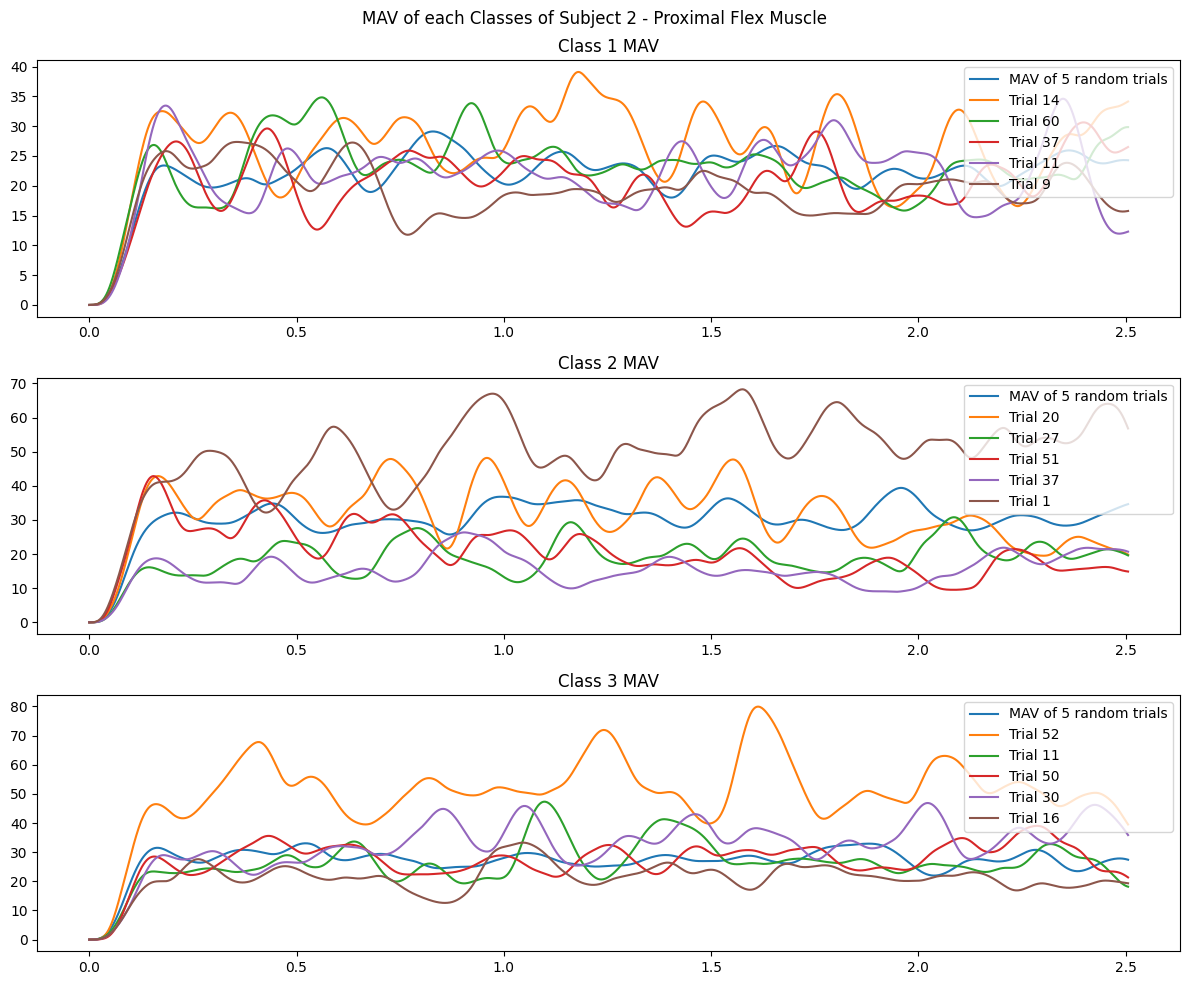

In [204]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Time vector for plotting
time_vector = np.linspace(0, 1283 / 512, 1283)

# Create the plot
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
fig.suptitle("MAV of each Classes of Subject 2 - Proximal Flex Muscle")

# Class 1
# MAV of first 5 trials
axes[0].plot(time_vector, np.mean(S2_class1_filtered[random_trials_class1], axis=0), label="MAV of 5 random trials")

# Plot 5 random trials (without replacement)
random_trials_class1 = np.random.choice(S2_class1_filtered.shape[0], 5, replace=False)
for trial in random_trials_class1:
    axes[0].plot(time_vector, S2_class1_filtered[trial], label=f"Trial {trial+1}")
    
axes[0].set_title("Class 1 MAV")
axes[0].legend(loc="upper right")

# Class 2
# MAV of first 5 trials
axes[1].plot(time_vector, np.mean(S2_class2_filtered[random_trials_class2], axis=0), label="MAV of 5 random trials")

# Plot 5 random trials (without replacement)
random_trials_class2 = np.random.choice(S2_class2_filtered.shape[0], 5, replace=False)
for trial in random_trials_class2:
    axes[1].plot(time_vector, S2_class2_filtered[trial], label=f"Trial {trial+1}")
    
axes[1].set_title("Class 2 MAV")
axes[1].legend(loc="upper right")

# Class 3
# MAV of first 5 trials
axes[2].plot(time_vector, np.mean(S2_class3_filtered[random_trials_class3], axis=0), label="MAV of 5 random trials")

# Plot 5 random trials (without replacement)
random_trials_class3 = np.random.choice(S2_class3_filtered.shape[0], 5, replace=False)
for trial in random_trials_class3:
    axes[2].plot(time_vector, S2_class3_filtered[trial], label=f"Trial {trial+1}")
    
axes[2].set_title("Class 3 MAV")
axes[2].legend(loc="upper right")

# Display the plot
plt.tight_layout()
plt.show()


In [231]:
##Compare distributions of MAV features vs grand average
grand_S1_class1=np.mean(S1_class1_filtered,axis=0)
grand_S1_class2=np.mean(S1_class2_filtered,axis=0)
grand_S1_class3=np.mean(S1_class3_filtered,axis=0)

grand_S2_class1=np.mean(S2_class1_filtered,axis=0)
grand_S2_class2=np.mean(S2_class2_filtered,axis=0)
grand_S2_class3=np.mean(S2_class3_filtered,axis=0)

In [233]:
grand_S2_class1


array([1.97519428e-05, 1.73051561e-04, 7.65927547e-04, ...,
       2.30580465e+01, 2.30255390e+01, 2.29920325e+01])

In [237]:
mav_subj2[:,2].reshape(180,-1)[S2_class1_idx].shape #이거는 

'''
Understanding the Data:
grand_S1_class1:

Shape: (1283,)
This is the average signal of 60 trials with 1283 data points each. Essentially, it represents the mean of the 60 trials over time, yielding a single signal that represents the "grand average" of the class 1 trials.
mav_subj1[:, 2]:

Shape: (2160,)
This is the MAV feature for each trial, calculated by using a sliding window (of 200ms) over the signal. Since each trial consists of 1283 data points and you're using a sliding window with a step (probably 200ms), this results in 12 MAV points per trial.
The total number of points in mav_subj1[:, 2] corresponds to the total number of trials (60) multiplied by 12 (one MAV per window). Hence, the shape (2160,) means 60 trials * 12 MAV points per trial.
1. Comparing Grand Average and MAV Feature Distributions:
To answer how the grand average of the exercise compares with the MAV feature distributions, you can:

Plot the Grand Average (grand_S1_class1): This shows the overall trend of the exercise across all trials.

Plot the MAV features (mav_subj1[:, 2]): This represents the distribution of the MAV values for the exercise (with a window of 200ms for each trial).

2. Plotting:
You can plot both the grand average and the MAV features for visual comparison. Since the grand_S1_class1 has 1283 points, and the mav_subj1[:, 2] has 2160 MAV points, you'll want to make sure they are plotted correctly.

Here’s a step-by-step process to plot them:

Plot the Grand Average of the class (grand_S1_class1).
Reshape the MAV data if needed to visualize it appropriately (you can plot the MAV points for each trial, or you can calculate the mean MAV and plot that for an overview).
Overlay both plots for visual comparison.

'''

'\nUnderstanding the Data:\ngrand_S1_class1:\n\nShape: (1283,)\nThis is the average signal of 60 trials with 1283 data points each. Essentially, it represents the mean of the 60 trials over time, yielding a single signal that represents the "grand average" of the class 1 trials.\nmav_subj1[:, 2]:\n\nShape: (2160,)\nThis is the MAV feature for each trial, calculated by using a sliding window (of 200ms) over the signal. Since each trial consists of 1283 data points and you\'re using a sliding window with a step (probably 200ms), this results in 12 MAV points per trial.\nThe total number of points in mav_subj1[:, 2] corresponds to the total number of trials (60) multiplied by 12 (one MAV per window). Hence, the shape (2160,) means 60 trials * 12 MAV points per trial.\n1. Comparing Grand Average and MAV Feature Distributions:\nTo answer how the grand average of the exercise compares with the MAV feature distributions, you can:\n\nPlot the Grand Average (grand_S1_class1): This shows the ove

In [238]:
mav_subj2[:,2].reshape(180,-1)[S2_class1_idx].shape

(60, 12)

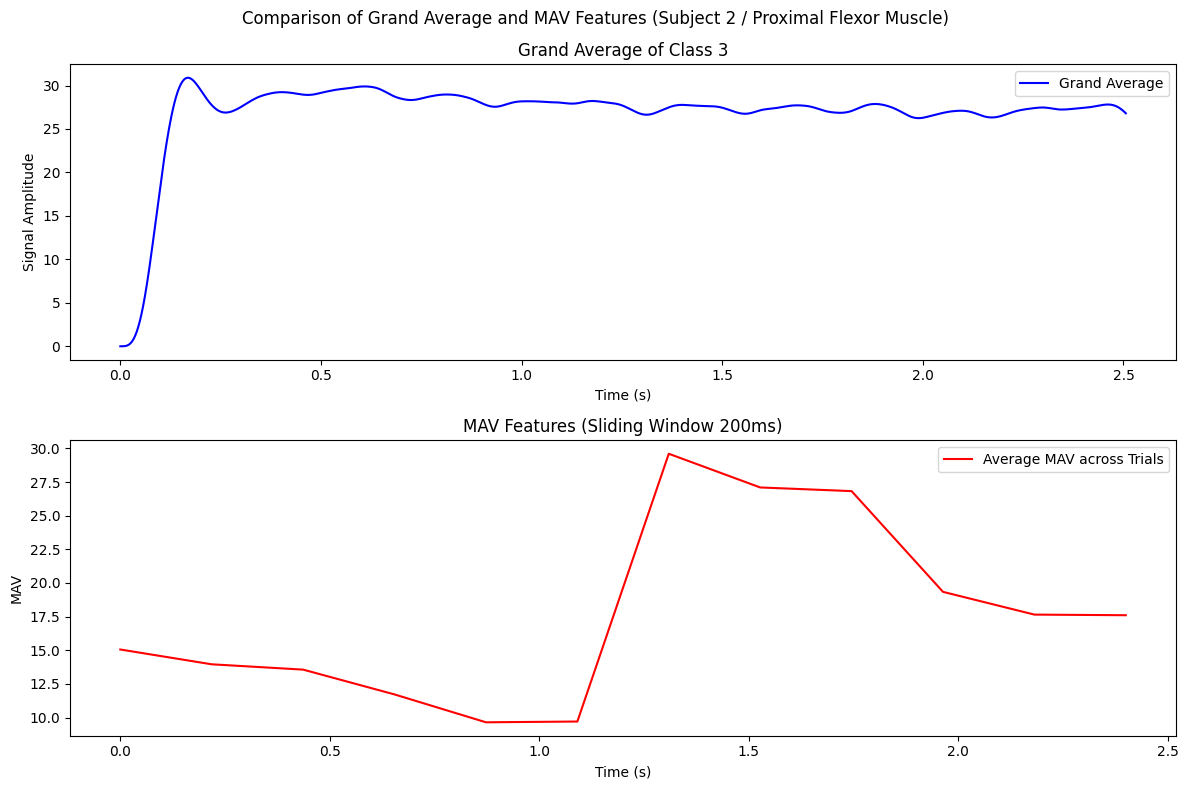

In [241]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming grand_S1_class1 is (1283,)
# Assuming mav_subj1[:,2] is (2160,)

# Time vector for grand average (since grand_S1_class1 has 1283 points)
time_vector_grand_avg = np.linspace(0, 1283 / 512, 1283)  # Adjust based on your sampling rate

# Time vector for MAV (12 points per trial, 60 trials)
time_vector_mav = np.linspace(0, 200 * 12 / 1000, 12)  # Time in seconds for each window in the MAV (12 points per trial)

# Reshape mav_subj1[:,2] to 60 trials x 12 MAV points per trial
mav_subj2_reshaped = mav_subj2[:, 2].reshape(180, -1)[S2_class3_idx]

# Calculate the average MAV across all trials for visualization
avg_mav = np.mean(mav_subj2_reshaped, axis=0)

# Plotting the Grand Average vs MAV features
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
fig.suptitle("Comparison of Grand Average and MAV Features (Subject 2 / Proximal Flexor Muscle)")

# Plot the Grand Average
axes[0].plot(time_vector_grand_avg, grand_S2_class3, label="Grand Average", color='blue')
axes[0].set_title("Grand Average of Class 3")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Signal Amplitude")
axes[0].legend()

# Plot the MAV Features (you can either plot all trials or just the average MAV)
axes[1].plot(time_vector_mav, avg_mav, label="Average MAV across Trials", color='red')
axes[1].set_title("MAV Features (Sliding Window 200ms)")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("MAV")
axes[1].legend()

# Display both plots
plt.tight_layout()
plt.show()


## Model 학습

In [259]:
mav_feature_subj1=np.load('mav_feature_subj1.npy').reshape(180,-1)
mav_feature_subj2=np.load('mav_feature_subj2.npy').reshape(180,-1)
zcr_feature_subj1=np.load('zcr_feature_subj1.npy').reshape(180,-1)
zcr_feature_subj2=np.load('zcr_feature_subj2.npy').reshape(180,-1)

In [260]:
mav_feature_subj1.shape #각각 feature당 180,4,12 이다! --> (180, 48 로 형태 맞춘후에 각 class별로 ..train하기.)

(180, 48)

In [261]:
S1_class1_mav=mav_feature_subj1[S1_class1_idx]
S1_class2_mav=mav_feature_subj1[S1_class2_idx]
S1_class3_mav=mav_feature_subj1[S1_class3_idx]
S1_class1_zcr=zcr_feature_subj1[S1_class1_idx]
S1_class2_zcr=zcr_feature_subj1[S1_class2_idx]
S1_class3_zcr=zcr_feature_subj1[S1_class3_idx]

S2_class1_mav=mav_feature_subj2[S2_class1_idx]
S2_class2_mav=mav_feature_subj2[S2_class2_idx]
S2_class3_mav=mav_feature_subj2[S2_class3_idx]
S2_class1_zcr=zcr_feature_subj2[S2_class1_idx]
S2_class2_zcr=zcr_feature_subj2[S2_class2_idx]
S2_class3_zcr=zcr_feature_subj2[S2_class3_idx]

In [262]:
S1_class1_zcr.shape 
#각각 이제 class당 60,48 개 feature(4개 sensor * 12 feature per trial) 총 60 trial, 6 run,class당 10번 per trial!


(60, 48)

In [267]:
S1_class1_feat=np.hstack([S1_class1_mav, S1_class1_zcr])
S1_class2_feat=np.hstack([S1_class2_mav, S1_class2_zcr])
S1_class3_feat=np.hstack([S1_class3_mav, S1_class3_zcr])

S2_class1_feat=np.hstack([S2_class1_mav, S2_class1_zcr])
S2_class2_feat=np.hstack([S2_class2_mav, S2_class2_zcr])
S2_class3_feat=np.hstack([S2_class3_mav, S2_class3_zcr])


In [ ]:
#  1. Use both features to build a 3-class classi er for each subject. Use only the rst 5 runs to
#  optimize the choice of the classi er through run-wise cross-validation (Experiment with at least
#  two classi ers: e.g. linear and quadratic LDA). What is the advantage of using run-wise cross
#  validation?
#  2. Test your chosen per-subject classi ers on the corresponding sixth run of each subject. How does
#  the classi cation accuracy compare with the run-wise cross-validation accuracy? Comment on the
#  result.
#  3. Transfer Decoders: Test the decoder of each subject on the sixth run of the other subject.
#  Comment on the results

Computing performance metrics...

===== LDA CLASSIFICATION PERFORMANCE SUMMARY =====
Within-Subject Performance:
  Subject 1: 0.6500
  Subject 2: 0.8833

Cross-Subject Performance:
  Subject 1 → Subject 2: 0.3389
  Subject 2 → Subject 1: 0.4444


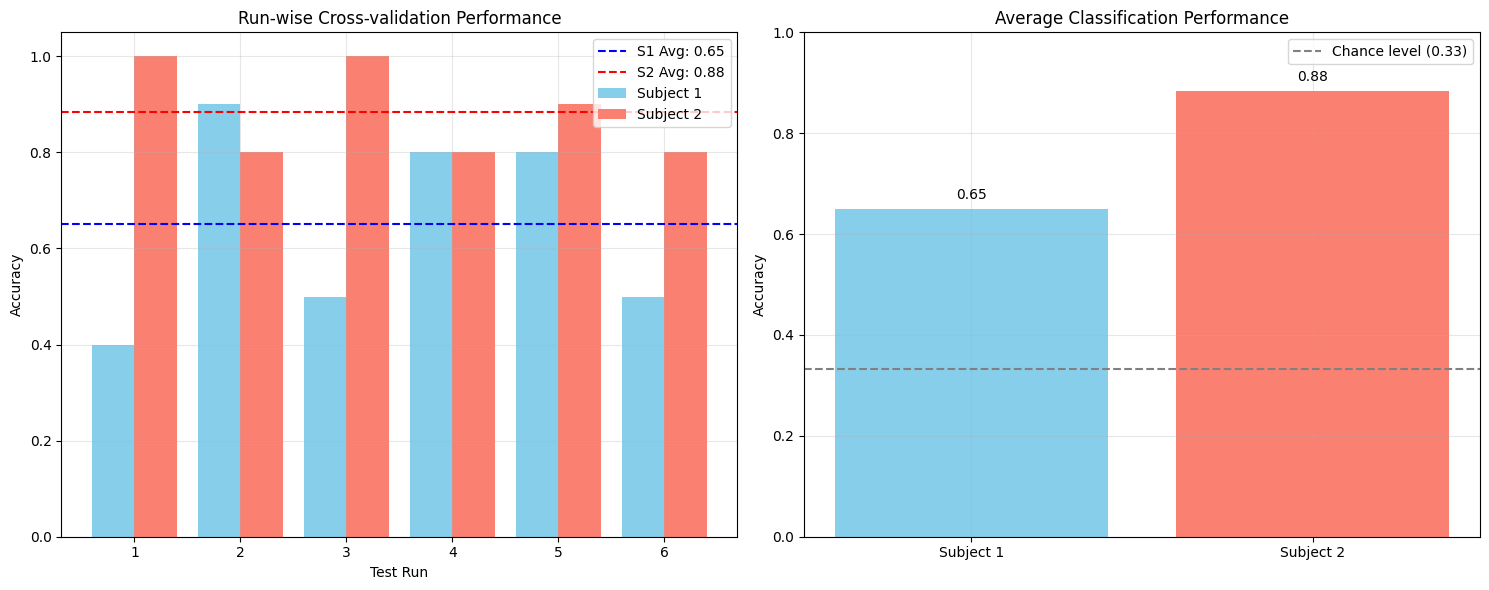

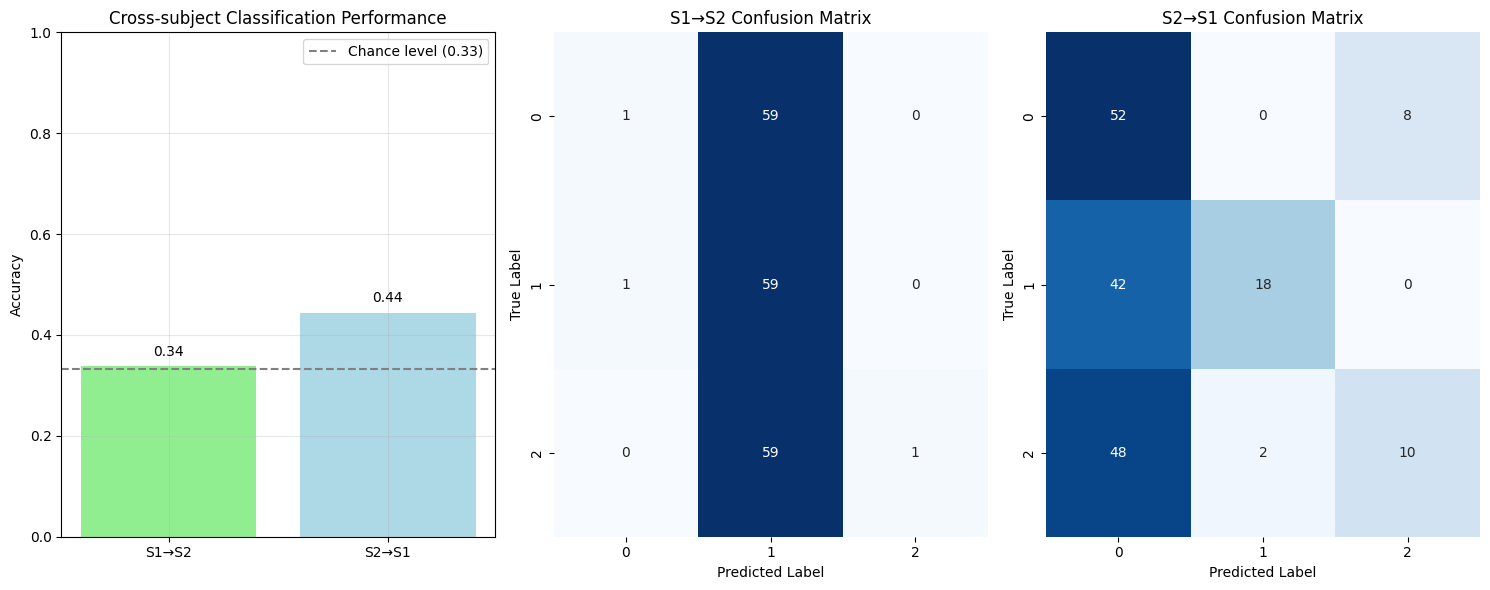

In [274]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Assuming you have the following data:
# S1_class1_feat, S1_class2_feat, S1_class3_feat for Subject 1
# S2_class1_feat, S2_class2_feat, S2_class3_feat for Subject 2
# The shape is (60, 96) for each class and feature.

# Combine the data for each subject
S1_data = np.vstack([S1_class1_feat, S1_class2_feat, S1_class3_feat])  # Shape (180, 96)
S2_data = np.vstack([S2_class1_feat, S2_class2_feat, S2_class3_feat])  # Shape (180, 96)

# Create the labels (0: Class 1, 1: Class 2, 2: Class 3)
S1_labels = np.array([0]*60 + [1]*60 + [2]*60)
S2_labels = np.array([0]*60 + [1]*60 + [2]*60)

# Function to perform run-wise cross-validation with detailed results
def run_wise_cv(data, labels, num_runs=6, run_size=10):
    accuracies = []
    run_results = []
    
    for run in range(num_runs):
        # Split into train and test sets for this run
        test_start = run * run_size
        test_end = test_start + run_size
        
        X_train = np.vstack([data[:test_start], data[test_end:]])
        y_train = np.concatenate([labels[:test_start], labels[test_end:]])
        
        X_test = data[test_start:test_end]
        y_test = labels[test_start:test_end]
        
        # Train the classifier
        classifier = LDA()
        classifier.fit(X_train, y_train)
        
        # Test on this run
        y_pred = classifier.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        run_results.append({
            'run': run + 1,
            'accuracy': accuracy,
            'predictions': y_pred,
            'true_labels': y_test
        })
        
    return np.mean(accuracies), run_results

# Function to test cross-subject performance
def cross_subject_test(train_data, train_labels, test_data, test_labels):
    # Train a model on all data from one subject
    classifier = LDA()
    classifier.fit(train_data, train_labels)
    
    # Test on all data from the other subject
    y_pred = classifier.predict(test_data)
    
    # Calculate accuracy
    accuracy = accuracy_score(test_labels, y_pred)
    
    # Calculate confusion matrix
    cm = confusion_matrix(test_labels, y_pred)
    
    return accuracy, cm, y_pred

# Train and test classifiers
print("Computing performance metrics...")

# Within-subject performance using run-wise cross-validation
S1_accuracy, S1_run_results = run_wise_cv(S1_data, S1_labels)
S2_accuracy, S2_run_results = run_wise_cv(S2_data, S2_labels)

# Cross-subject performance
S1_to_S2_accuracy, S1_to_S2_cm, S1_to_S2_pred = cross_subject_test(S1_data, S1_labels, S2_data, S2_labels)
S2_to_S1_accuracy, S2_to_S1_cm, S2_to_S1_pred = cross_subject_test(S2_data, S2_labels, S1_data, S1_labels)

# Visualization functions
def plot_within_subject_performance(S1_accuracy, S1_run_results, S2_accuracy, S2_run_results):
    # Create figure for within-subject performance
    plt.figure(figsize=(15, 6))
    
    # Plot run-wise accuracies
    plt.subplot(1, 2, 1)
    runs = list(range(1, 7))
    s1_accs = [result['accuracy'] for result in S1_run_results]
    s2_accs = [result['accuracy'] for result in S2_run_results]
    
    plt.bar([r-0.2 for r in runs], s1_accs, width=0.4, label='Subject 1', color='skyblue')
    plt.bar([r+0.2 for r in runs], s2_accs, width=0.4, label='Subject 2', color='salmon')
    
    plt.axhline(y=S1_accuracy, color='blue', linestyle='--', label=f'S1 Avg: {S1_accuracy:.2f}')
    plt.axhline(y=S2_accuracy, color='red', linestyle='--', label=f'S2 Avg: {S2_accuracy:.2f}')
    
    plt.xlabel('Test Run')
    plt.ylabel('Accuracy')
    plt.title('Run-wise Cross-validation Performance')
    plt.xticks(runs)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot average performance
    plt.subplot(1, 2, 2)
    plt.bar(['Subject 1', 'Subject 2'], [S1_accuracy, S2_accuracy], color=['skyblue', 'salmon'])
    plt.axhline(y=1/3, color='gray', linestyle='--', label='Chance level (0.33)')
    
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('Average Classification Performance')
    for i, v in enumerate([S1_accuracy, S2_accuracy]):
        plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_cross_subject_performance(S1_to_S2_accuracy, S2_to_S1_accuracy, S1_to_S2_cm, S2_to_S1_cm):
    # Create figure for cross-subject performance
    plt.figure(figsize=(15, 6))
    
    # Plot cross-subject accuracies
    plt.subplot(1, 3, 1)
    cross_scores = [S1_to_S2_accuracy, S2_to_S1_accuracy]
    labels = ['S1→S2', 'S2→S1']
    
    plt.bar(labels, cross_scores, color=['lightgreen', 'lightblue'])
    plt.axhline(y=1/3, color='gray', linestyle='--', label='Chance level (0.33)')
    
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('Cross-subject Classification Performance')
    for i, v in enumerate(cross_scores):
        plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot confusion matrices
    plt.subplot(1, 3, 2)
    sns.heatmap(S1_to_S2_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('S1→S2 Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    plt.subplot(1, 3, 3)
    sns.heatmap(S2_to_S1_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('S2→S1 Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

# Display performance summary
print("\n===== LDA CLASSIFICATION PERFORMANCE SUMMARY =====")
print(f"Within-Subject Performance:")
print(f"  Subject 1: {S1_accuracy:.4f}")
print(f"  Subject 2: {S2_accuracy:.4f}")
print(f"\nCross-Subject Performance:")
print(f"  Subject 1 → Subject 2: {S1_to_S2_accuracy:.4f}")
print(f"  Subject 2 → Subject 1: {S2_to_S1_accuracy:.4f}")
print("============================================")

# Plot the results
plot_within_subject_performance(S1_accuracy, S1_run_results, S2_accuracy, S2_run_results)
plot_cross_subject_performance(S1_to_S2_accuracy, S2_to_S1_accuracy, S1_to_S2_cm, S2_to_S1_cm)

Computing performance metrics...

===== Random Forest CLASSIFICATION PERFORMANCE SUMMARY =====
Within-Subject Performance:
  Subject 1: 0.7333
  Subject 2: 0.9500

Cross-Subject Performance:
  Subject 1 → Subject 2: 0.4111
  Subject 2 → Subject 1: 0.3778


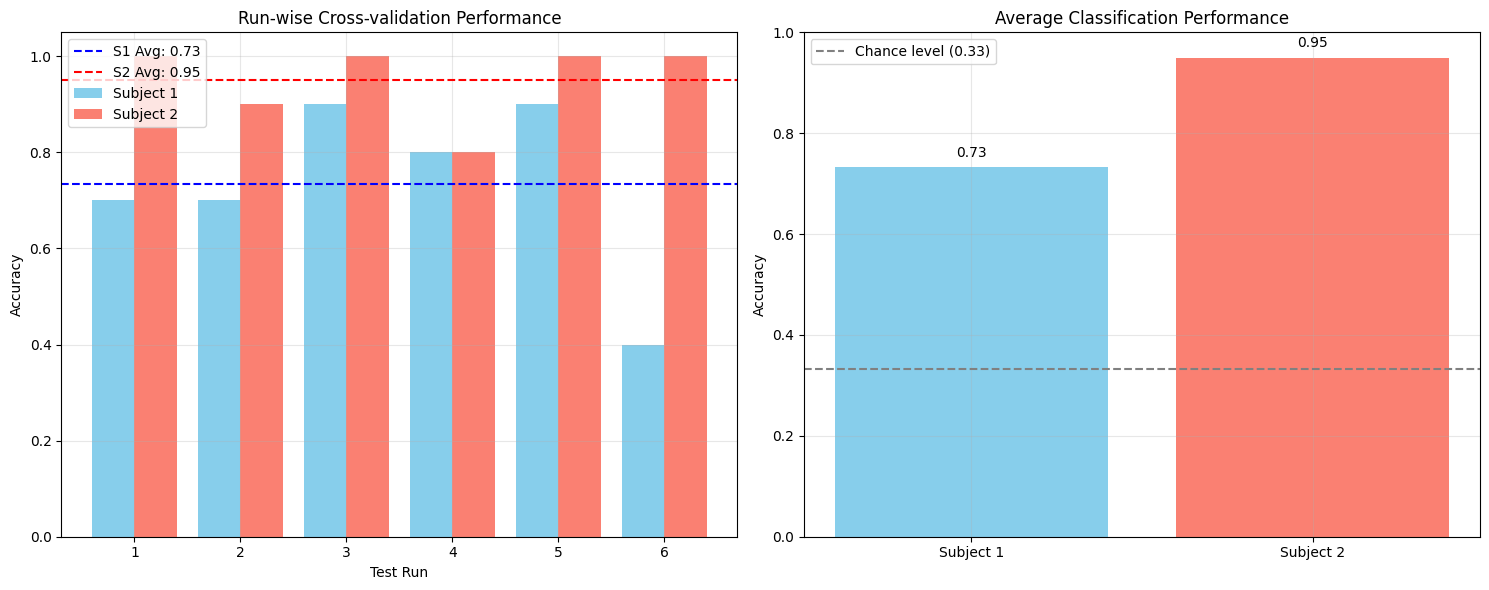

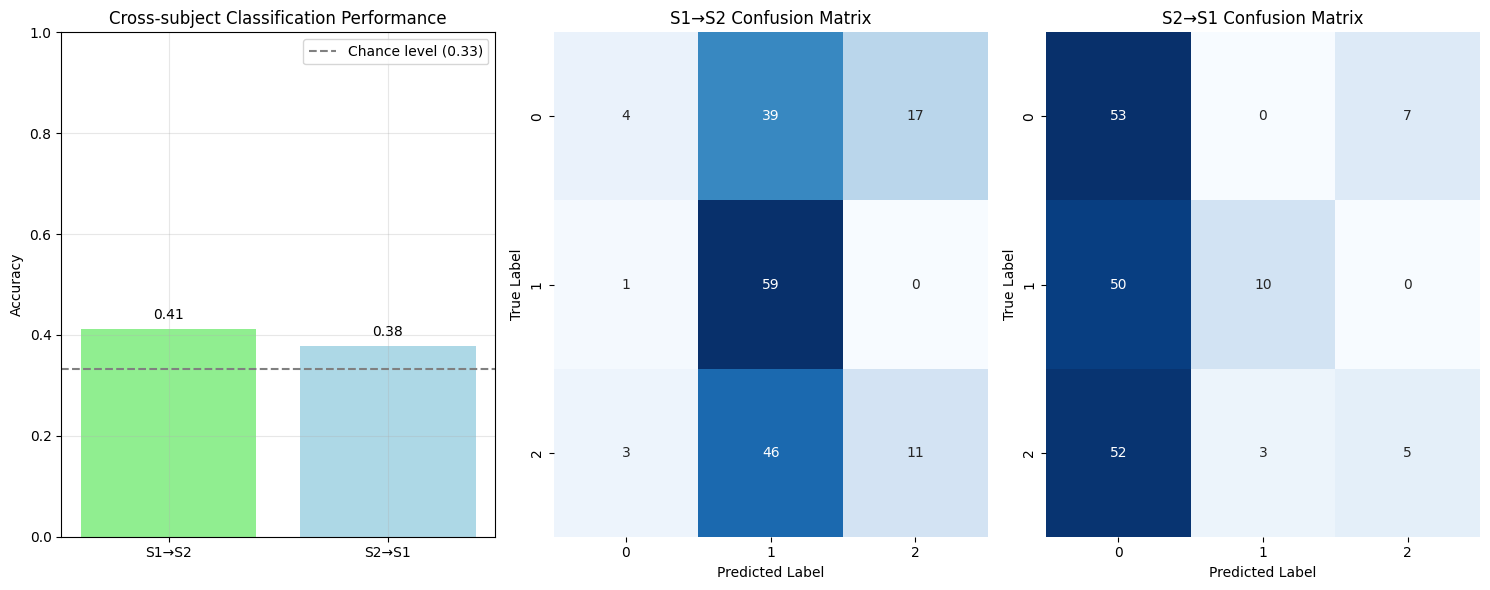

In [276]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Assuming you have the following data:
# S1_class1_feat, S1_class2_feat, S1_class3_feat for Subject 1
# S2_class1_feat, S2_class2_feat, S2_class3_feat for Subject 2
# The shape is (60, 96) for each class and feature.

# Combine the data for each subject
S1_data = np.vstack([S1_class1_feat, S1_class2_feat, S1_class3_feat])  # Shape (180, 96)
S2_data = np.vstack([S2_class1_feat, S2_class2_feat, S2_class3_feat])  # Shape (180, 96)

# Create the labels (0: Class 1, 1: Class 2, 2: Class 3)
S1_labels = np.array([0]*60 + [1]*60 + [2]*60)
S2_labels = np.array([0]*60 + [1]*60 + [2]*60)

# Function to perform run-wise cross-validation with detailed results
def run_wise_cv(data, labels, num_runs=6, run_size=10):
    accuracies = []
    run_results = []
    
    for run in range(num_runs):
        # Split into train and test sets for this run
        test_start = run * run_size
        test_end = test_start + run_size
        
        X_train = np.vstack([data[:test_start], data[test_end:]])
        y_train = np.concatenate([labels[:test_start], labels[test_end:]])
        
        X_test = data[test_start:test_end]
        y_test = labels[test_start:test_end]
        
        # Train the classifier
        classifier = RandomForestClassifier(n_estimators=100)
        classifier.fit(X_train, y_train)
        
        # Test on this run
        y_pred = classifier.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        run_results.append({
            'run': run + 1,
            'accuracy': accuracy,
            'predictions': y_pred,
            'true_labels': y_test
        })
        
    return np.mean(accuracies), run_results

# Function to test cross-subject performance
def cross_subject_test(train_data, train_labels, test_data, test_labels):
    # Train a model on all data from one subject
    classifier = RandomForestClassifier(n_estimators=100)
    classifier.fit(train_data, train_labels)
    
    # Test on all data from the other subject
    y_pred = classifier.predict(test_data)
    
    # Calculate accuracy
    accuracy = accuracy_score(test_labels, y_pred)
    
    # Calculate confusion matrix
    cm = confusion_matrix(test_labels, y_pred)
    
    return accuracy, cm, y_pred

# Train and test classifiers
print("Computing performance metrics...")

# Within-subject performance using run-wise cross-validation
S1_accuracy, S1_run_results = run_wise_cv(S1_data, S1_labels)
S2_accuracy, S2_run_results = run_wise_cv(S2_data, S2_labels)

# Cross-subject performance
S1_to_S2_accuracy, S1_to_S2_cm, S1_to_S2_pred = cross_subject_test(S1_data, S1_labels, S2_data, S2_labels)
S2_to_S1_accuracy, S2_to_S1_cm, S2_to_S1_pred = cross_subject_test(S2_data, S2_labels, S1_data, S1_labels)

# Visualization functions
def plot_within_subject_performance(S1_accuracy, S1_run_results, S2_accuracy, S2_run_results):
    # Create figure for within-subject performance
    plt.figure(figsize=(15, 6))
    
    # Plot run-wise accuracies
    plt.subplot(1, 2, 1)
    runs = list(range(1, 7))
    s1_accs = [result['accuracy'] for result in S1_run_results]
    s2_accs = [result['accuracy'] for result in S2_run_results]
    
    plt.bar([r-0.2 for r in runs], s1_accs, width=0.4, label='Subject 1', color='skyblue')
    plt.bar([r+0.2 for r in runs], s2_accs, width=0.4, label='Subject 2', color='salmon')
    
    plt.axhline(y=S1_accuracy, color='blue', linestyle='--', label=f'S1 Avg: {S1_accuracy:.2f}')
    plt.axhline(y=S2_accuracy, color='red', linestyle='--', label=f'S2 Avg: {S2_accuracy:.2f}')
    
    plt.xlabel('Test Run')
    plt.ylabel('Accuracy')
    plt.title('Run-wise Cross-validation Performance')
    plt.xticks(runs)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot average performance
    plt.subplot(1, 2, 2)
    plt.bar(['Subject 1', 'Subject 2'], [S1_accuracy, S2_accuracy], color=['skyblue', 'salmon'])
    plt.axhline(y=1/3, color='gray', linestyle='--', label='Chance level (0.33)')
    
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('Average Classification Performance')
    for i, v in enumerate([S1_accuracy, S2_accuracy]):
        plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_cross_subject_performance(S1_to_S2_accuracy, S2_to_S1_accuracy, S1_to_S2_cm, S2_to_S1_cm):
    # Create figure for cross-subject performance
    plt.figure(figsize=(15, 6))
    
    # Plot cross-subject accuracies
    plt.subplot(1, 3, 1)
    cross_scores = [S1_to_S2_accuracy, S2_to_S1_accuracy]
    labels = ['S1→S2', 'S2→S1']
    
    plt.bar(labels, cross_scores, color=['lightgreen', 'lightblue'])
    plt.axhline(y=1/3, color='gray', linestyle='--', label='Chance level (0.33)')
    
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('Cross-subject Classification Performance')
    for i, v in enumerate(cross_scores):
        plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot confusion matrices
    plt.subplot(1, 3, 2)
    sns.heatmap(S1_to_S2_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('S1→S2 Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    plt.subplot(1, 3, 3)
    sns.heatmap(S2_to_S1_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('S2→S1 Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

# Display performance summary
print("\n===== Random Forest CLASSIFICATION PERFORMANCE SUMMARY =====")
print(f"Within-Subject Performance:")
print(f"  Subject 1: {S1_accuracy:.4f}")
print(f"  Subject 2: {S2_accuracy:.4f}")
print(f"\nCross-Subject Performance:")
print(f"  Subject 1 → Subject 2: {S1_to_S2_accuracy:.4f}")
print(f"  Subject 2 → Subject 1: {S2_to_S1_accuracy:.4f}")
print("============================================")

# Plot the results
plot_within_subject_performance(S1_accuracy, S1_run_results, S2_accuracy, S2_run_results)
plot_cross_subject_performance(S1_to_S2_accuracy, S2_to_S1_accuracy, S1_to_S2_cm, S2_to_S1_cm)

In [ ]:
'''
Within-subject classification using Linear Discriminant Analysis (LDA) with run-wise cross-validation

Shows how well the model classifies each subject's own data
Calculates accuracy for each test run and the overall average


Cross-subject classification to evaluate transfer learning

Tests how well a model trained on Subject 1 performs on Subject 2 data and vice versa
Generates confusion matrices to show which classes transfer better between subjects


Visualization components

Bar charts comparing run-by-run accuracy and average performance
Visual comparison between subjects with reference to chance level
Detailed confusion matrices for cross-subject classification



The enhanced code provides both numerical metrics and visual representations to help evaluate classification performance, making it easier to interpret the results and identify patterns in the data.
'''